In [1]:
from mvdts.call_algo import fit
import pandas as pd
import numpy as np
from mvdts.dt_common.nodes import Leaf
from mvdts.dt_common.prediction import print_model, time_it
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
def read_data(dataLocation):
    """
   Reading data and returning in proper format
   :param dataLocation: location of data
   :return: set of features, labels and combine
   """
    df = pd.read_csv(dataLocation)

    X = np.array(df[df.columns[:-1]].values.tolist())
    y = np.array(df[df.columns[-1]].values.tolist())
    y = pd.to_numeric(y)
    return [X, y]

In [3]:
# model prediction using all tree
def classify(x_point, model, depth=0):
    # decision is leaf node, when it reach leaf decision theta
    # use dot product to find value based on used feature index
    # finding related feature index and adding 1 for bias
    
    #testing if model is predicting form same depth or different by printing in leaf node 
   
    if isinstance(model, Leaf):
        # pt = np.append(x_point[model.indexes], 1).reshape(len(x_point[model.indexes])+1, 1)
        # r = model.question.dot(pt)
        # print("feature indexes:{}, values:{}, r:{}".format(model.indexes, x_point[model.indexes], r))
        # return model.predictions

        if len(model.predictions) >= 2:
            # leaf node has more than two prediction then check high probability
            # in case of 50% choose last one
            pred_dict = predict_proba(model.predictions)
            max_prob = 0
            label_name = 0

            for i, v in pred_dict.items():
                if v >= max_prob:
                    max_prob = v # in case of of 50/50 choose last one
                    label_name = i
            print("Prediction from depth: ", depth)
            return int(label_name)
        else:
            #print(model.predictions)
            # int for only integer classes
            # next(iter( dfdds.items() ))[0] if you have multiple
            print("Prediction from depth: ", depth)
            return next(iter(model.predictions))
        
    else:
        depth = model.depth
        #print("Looking for inner nodes on depth", depth)
            
            
        pt = np.append(x_point[model.indexes], 1)
        r = model.question.T.dot(pt)
        # pt = np.append(x_point[model.indexes], 1).reshape(len(x_point[model.indexes])+1, 1)
        # r = model.question.dot(pt)

        # recursive approach to find out leaf decision
        # look for branch only if it is not leaf node it self
        if r > 0:
            return classify(x_point, model.true_branch, depth)
        else:
            return classify(x_point, model.false_branch, depth)


# find probability for prediction
def predict_proba(prediction):
    total = sum({prediction[i] for i in prediction})
    result = {}
    for i, v in prediction.items():
        result[i] = v / total

    return result

# predict call request
def predict(x, tree):
    # for storing predicted values
    yh_list = []
    # if only one value is passed then direct compute else do in loop
    if len(x.shape) == 1:
        return classify(x, tree)
    else:
        for i, value in enumerate(x):
            yh = classify(value, tree)
            yh_list.append(yh)
        return yh_list


In [4]:
# algorithm = "lr_mvdt"
# train_data = read_data("data/10D_20ng_CG_RM_k1_train.csv")
# test_data = read_data("data/10D_20ng_CG_RM_k1_test.csv")

# epochs = 800
# min_leaf_point = 5
# n_features = 2

# tree = fit(algorithm, train_data, epochs, min_leaf_point, n_features)

# y_pred_train = predict(train_data[0], tree)
# y_pred_test = predict(test_data[0], tree)

# print("Training accuracy:{}, precision: {}, recall: {}, f1: {}".format(accuracy_score(train_data[1], y_pred_train),
#                                             precision_score(train_data[1], y_pred_train),
#                                             recall_score(train_data[1], y_pred_train),
#                                             f1_score(train_data[1], y_pred_train)))

# print("Testing accuracy:{}, precision: {}, recall: {}, f1: {}".format(accuracy_score(test_data[1], y_pred_test),
#                                                                        precision_score(test_data[1], y_pred_test),
#                                                                        recall_score(test_data[1], y_pred_test),
#                                                                         f1_score(test_data[1],y_pred_test)))


509 491
depth 0, total rows:1000 left branch labels [1=458, 0=312],right branch [1=51, 0=179]

[[-0.10405774]
 [-0.99457126]
 [ 3.89638772]]
theta: [[-0.10405774]
 [-0.99457126]
 [ 3.89638772]]
theta flat: [[-0.10405774]
 [-0.99457126]
 [ 3.89638772]]
458 312
depth 1, total rows:770 left branch labels [1=385, 0=132],right branch [1=73, 0=180]

[[-0.15346391]
 [ 0.98815425]
 [ 3.11316117]]
theta: [[-0.15346391]
 [ 0.98815425]
 [ 3.11316117]]
theta flat: [[-0.15346391]
 [ 0.98815425]
 [ 3.11316117]]
385 132
depth 2, total rows:517 left branch labels [1=167, 0=6],right branch [1=218, 0=126]

[[-0.97568902]
 [ 0.2191596 ]
 [-2.65338363]]
theta: [[-0.97568902]
 [ 0.2191596 ]
 [-2.65338363]]
theta flat: [[-0.97568902]
 [ 0.2191596 ]
 [-2.65338363]]
167 6
depth 3, total rows:173 left branch labels [1=163, 0=1],right branch [1=4, 0=5]

[[-0.29695864]
 [-0.95489034]
 [ 1.97605519]]
theta: [[-0.29695864]
 [-0.95489034]
 [ 1.97605519]]
theta flat: [[-0.29695864]
 [-0.95489034]
 [ 1.97605519]]
fro

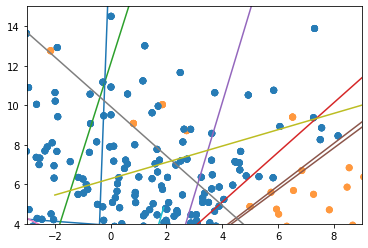

In [17]:
algorithm = "rs_mvdt" #lr_mvdt rs_mvdt
train_data = read_data("data/2d/x_shape.csv")


# test_data = read_data()
epochs = 100
min_leaf_point = 5
n_features = 2

tree = fit(algorithm, train_data, epochs, min_leaf_point, n_features)

# y_pred_train = predict(train_data[0], tree)

# print("accuracy {}".format(accuracy_score(train_data[1], y_pred_train)))



In [3]:
predict(train_data[0][343], tree)

NameError: name 'predict' is not defined

In [ ]:
tree.question.reshape(3,1)

In [ ]:
train_data[0].shape[1]